In [1]:
#libraries
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
m = 60
x = np.zeros((m,3))
rng = np.random.default_rng(seed=42)
angles = (rng.random(m) **3 + 0.5) *2 * np.pi 
x[: , 0] , x[:,1] = np.cos(angles) , np.sin(angles)
x += 0.28 * rng.standard_normal((m,3))
x = Rotation.from_rotvec([np.pi / 29 , -np.pi / 20 , np.pi/4]).apply(x)
x += [0.2 , 0, 0.2]

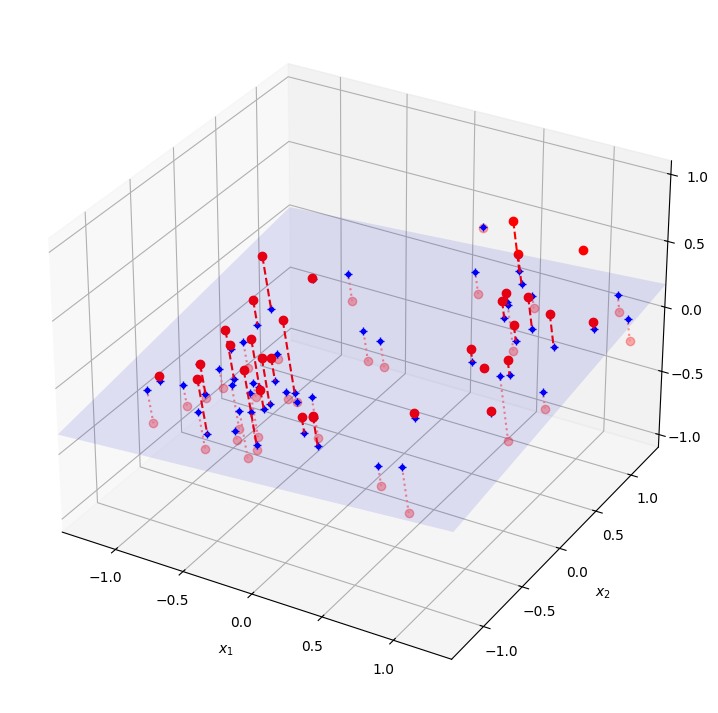

In [3]:
pca = PCA(n_components=2)
x2d = pca.fit_transform(x)
x3d_inv = pca.inverse_transform(x2d)
x_centered = x - x.mean(axis=0)
u , s , vt = np.linalg.svd(x_centered)

axes = [-1.4 , 1.4 , -1.4 , 1.4  , -1.1 , 1.1]
x1 , x2 = np.meshgrid(np.linspace(axes[0] , axes[1] , 10),
                      np.linspace(axes[2] , axes[3] , 10))
w1 , w2 = np.linalg.solve(vt[:2 , :2 ] , vt[:2 , 2])
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]
x3d_above = x[x[: , 2] >= x3d_inv[: , 2]]
x3d_below = x[x[: , 2] <= x3d_inv[: , 2]]

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111 , projection="3d")

# plot samples and projection lines below plane first
ax.plot(x3d_below[:, 0], x3d_below[:, 1], x3d_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if x[i, 2] < x3d_inv[i, 2]:
        ax.plot([x[i][0], x3d_inv[i][0]],
                [x[i][1], x3d_inv[i][1]],
                [x[i][2], x3d_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # projection plane
ax.plot(x3d_inv[:, 0], x3d_inv[:, 1], x3d_inv[:, 2], "b+")  # projected samples
ax.plot(x3d_inv[:, 0], x3d_inv[:, 1], x3d_inv[:, 2], "b.")

# now plot projection lines and samples above plane
for i in range(m):
    if x[i, 2] >= x3d_inv[i, 2]:
        ax.plot([x[i][0], x3d_inv[i][0]],
                [x[i][1], x3d_inv[i][1]],
                [x[i][2], x3d_inv[i][2]], "r--")

ax.plot(x3d_above[:, 0], x3d_above[:, 1], x3d_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])


plt.show()